In [1]:
# Python bibliotekos
import numpy as np                  # "numpy" yra biblioteka darbui su didelėmis, daugiamatėmis masyvų ir matricų kolekcijomis bei matematinėmis funkcijomis
import pandas as pd                 # "pandas" suteikia struktūras duomenims ir įrankius jų analizei, pvz., DataFrame
import matplotlib.pyplot as plt     # "matplotlib.pyplot" yra vizualizacijos biblioteka, leidžianti piešti įvairius grafikus
import warnings                     # "warnings" leidžia valdyti įspėjimus: juos ignoruoti, spausdinti, ar klaidinti
import requests                     # "requests" leidžia siųsti HTTP užklausas naudojant Python
from datetime import datetime       # "datetime" modulis suteikia funkcijas darbui su data ir laiku
from bs4 import BeautifulSoup       # "BeautifulSoup" padeda atlikti internetinių puslapių šaltinio kodo (HTML, XML) analizę ir duomenų surinkimą
import time                         # "time" modulis suteikia funkcijas, susijusias su laiku, pvz., laiko gaišimą ar laiko matavimą
import sqlite3                      # "sqlite3" leidžia dirbti su SQLite duomenų bazėmis, atliekant duomenų saugojimo, atnaujinimo ir gavimo operacijas
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
warnings.filterwarnings('ignore')   # Nustato, kad visi įspėjimai būtų ignoruojami

# Set up Selenium webdriver options
from selenium import webdriver                          # "selenium.webdriver" leidžia automatizuoti veiksmus interneto naršyklėje
from selenium.webdriver.chrome.options import Options   # "Options" leidžia nustatyti konfigūracijas Chrome naršyklės draiveriui

# Papildomai importuojame: 
from sklearn.linear_model import LinearRegression  # Tiesinės regresijos modelis
from sklearn.model_selection import train_test_split  # Duomenų padalijimas į treniravimo ir testavimo rinkinius
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Duomenų rinkiniai - https://data.gov.lt/datasets/1828/#info
# (Elektros energijos suvartojimas pagal regionus, kas pusmetį)

# Pateikite elektros energijos suvartojimo apžvalgą: 
# Kokie regionai/miestai daugiausiai vartojo, kurie - mažiausiai? 
# Ar yra priklausomybė tarp vartojimo ir mėnesių, vidutinių mėnesio meteorologinių sąlygų? 
# Ar galite surasti/identifikuoti elektros energiją pasigaminančius vartotojus?

# Su plotly.express scatter_mapbox()
# vizualizuokite daugiausiai energijos vartojančius
# miestus/miestelius/teritorijas. Daug energijos vartojantis objektas –
# suvartoja ~30 proc daugiau el. energijos, nei vidutinis energijos
# suvartojimas objekto teritorijoje.

In [29]:
# C:\Users\Pauliussl\Paskaita80\didmiesciai.csv
# C:\Users\Pauliussl\Paskaita80\didmiesciai2.csv
# C:\Users\Pauliussl\Paskaita80\kit2.csv
# C:\Users\Pauliussl\Paskaita80\kiti.csv
# C:\Users\Pauliussl\Paskaita80\vidutiniai.csv
# C:\Users\Pauliussl\Paskaita80\vidutiniai2.xlsx

# 7-12 men. sujungimas 
file = r"C:\Users\Pauliussl\Paskaita80\vidutiniai.csv"
data = pd.read_csv(file, sep =';', encoding="windows-1257")

file = r"C:\Users\Pauliussl\Paskaita80\didmiesciai.csv"
data1 = pd.read_csv(file, sep =';', encoding="windows-1257")

file = r"C:\Users\Pauliussl\Paskaita80\kiti.csv"
data2 = pd.read_csv(file, sep =';', encoding="windows-1257")

IIpusmetis = pd.concat([data,data1,data2], ignore_index=True) 
IIpusmetis.head()

output_file = r"C:\Users\Pauliussl\Paskaita80\IIpusmetis.csv"
IIpusmetis.to_csv(output_file, index=False, sep=';', encoding="windows-1257")

# 1-6 men sujungimas 

# file = r"C:\Users\Pauliussl\Paskaita80\didmiesciai2.csv"
# data3 = pd.read_csv(file, sep =';', encoding="windows-1257")

# file = r"C:\Users\Pauliussl\Paskaita80\kit2.csv"
# data4 = pd.read_csv(file, sep =';', encoding="windows-1257")

# file = r"C:\Users\Pauliussl\Paskaita80\vidutiniai2.xlsx"
# data5 = pd.read_excel(file)

# Ipusmetis = pd.concat([data3,data4,data5], ignore_index=True)
# Ipusmetis.head()

# output_file = r"C:\Users\Pauliussl\Paskaita80\Ipusmetis.csv"
# Ipusmetis.to_csv(output_file, index=False, sep=';', encoding="windows-1257")

# Pusmeciu lenteliu sujungimas

# bendra_lentele = pd.merge(Ipusmetis, IIpusmetis, on=["REGIONAS", "SUT_TIPAS", "SUT_GAM", "GV_TIPAS", "GEN_GALIA"], how="outer")
# bendra_lentele.head()


In [11]:
# I pusmecio failo nuskaitymas
file1 = r"C:\Users\Pauliussl\Paskaita80\Ipusmetis.csv"
a = pd.read_csv(file1, sep=';', encoding="windows-1257")
a['GEN_GALIA'] = pd.to_numeric(a['GEN_GALIA'], errors='coerce')
a["GV_TIPAS"] = a["GV_TIPAS"].astype(str)
a.head()

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,KWH01,KWH02,KWH03,KWH04,KWH05,KWH06
0,Vilniaus regionas,KV,NaN,nan,0.0,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8
1,Vilniaus regionas,KV,NaN,nan,NaN,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8
2,Vilniaus regionas,KV,NaN,nan,NaN,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8
3,Vilniaus regionas,KV,NaN,nan,NaN,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8
4,Vilniaus regionas,KV,NaN,nan,0.0,3459470.8,3389592.8,3656872.6,3631011.4,3591220.6,3698914.8


In [30]:
# II pusmecio failo nuskaitymas
file2 = r"C:\Users\Pauliussl\Paskaita80\IIpusmetis.csv"
b = pd.read_csv(file2,sep=';', encoding="windows-1257")
b['GEN_GALIA'] = pd.to_numeric(b['GEN_GALIA'], errors='coerce')
b["GV_TIPAS"] = b["GV_TIPAS"].astype(str)
b.head()

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12
0,Šiaulių regionas,KV,NaN,nan,NaN,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0
1,Šiaulių regionas,KV,NaN,nan,0.0,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0
2,Šiaulių regionas,KV,NaN,nan,NaN,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0
3,Šiaulių regionas,KV,NaN,nan,NaN,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0
4,Šiaulių regionas,KV,NaN,nan,NaN,1362162.0,1255867.4,1108174.2,1095702.8,1083865.4,1048594.0


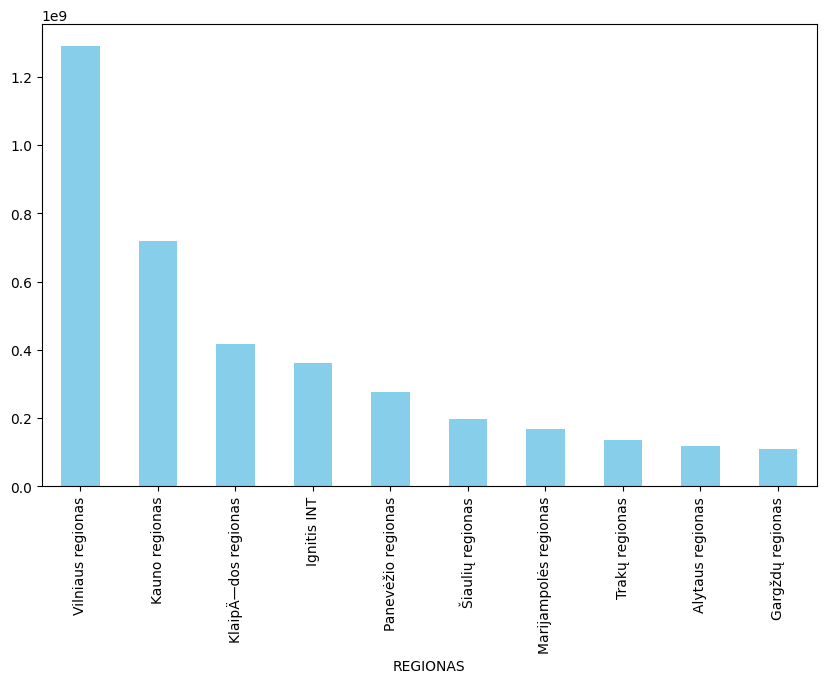

In [73]:
# Kokie regionai/miestai daugiausiai vartojo, kurie - mažiausiai? 

# Išrenkame tik reikalingus stulpelius
regionai = a[['REGIONAS', 'KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06']]

regionai = regionai.dropna(subset=['KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06'])
regionai = regionai[(regionai[['KWH01', 'KWH02', 'KWH03', 'KWH04', 'KWH05', 'KWH06']] != 0).any(axis=1)]
regionai['VISO'] = regionai[kw_columns].sum(axis=1)
regionai = regionai[['REGIONAS', 'VISO']]
regionai = regionai.groupby('REGIONAS')['VISO'].sum()
regionai.head()

top10 = regionai.sort_values(ascending=False)
top10 = top10.head(10)
top10.head()

plt.figure(figsize=(10,6))
top10.plot(kind='bar', color='skyblue')
plt.show()


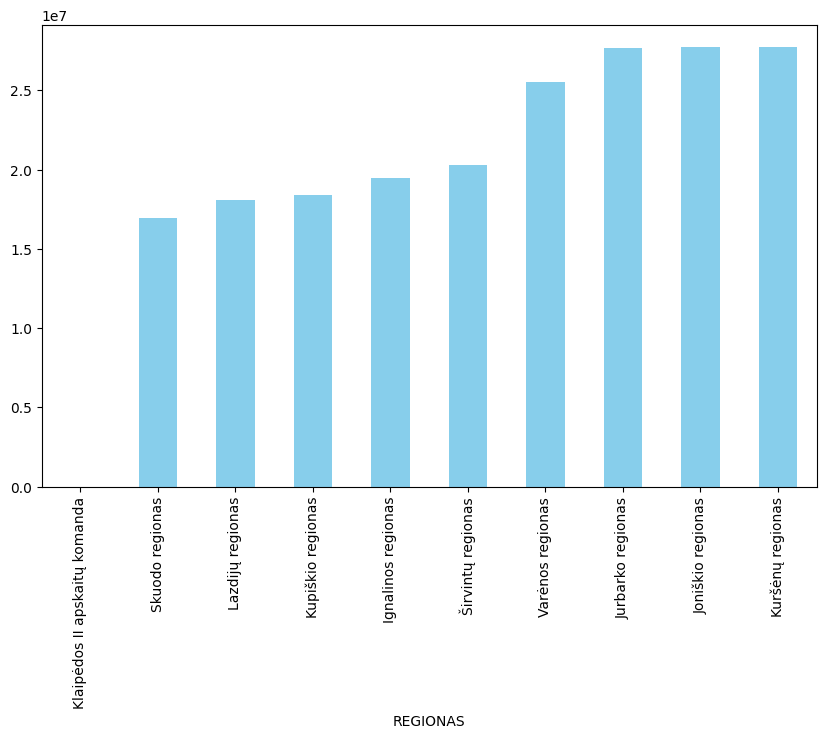

In [ ]:
# Kokie regionai/miestai daugiausiai vartojo, kurie - mažiausiai? 

last10 = regionai.sort_values(ascending=True)
last10 = last10.head(10)
last10.head()

plt.figure(figsize=(10,6))
last10.plot(kind='bar', color='skyblue')
plt.show()

<Figure size 1000x600 with 0 Axes>

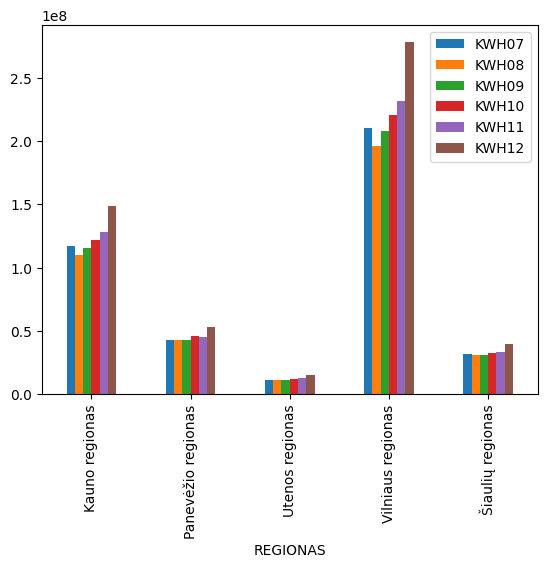

In [98]:
# Ar yra priklausomybė tarp vartojimo ir mėnesių, vidutinių mėnesio meteorologinių sąlygų? 

b.head()
men_suvartojimas = b[['REGIONAS', 'KWH07', 'KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12']]
men_suvartojimas = men_suvartojimas[men_suvartojimas['REGIONAS'].str.contains('viln|kaun|pane|iaul|uten', case=False, na=False)]
men_suvartojimas = men_suvartojimas.groupby('REGIONAS').sum()
men_suvartojimas = men_suvartojimas[(men_suvartojimas[['KWH07', 'KWH08', 'KWH09', 'KWH10', 'KWH11', 'KWH12']] != 0).any(axis=1)]
men_suvartojimas

plt.figure(figsize=(10,6))
men_suvartojimas.plot(kind='bar')
plt.show()

In [101]:
# Ar galite surasti/identifikuoti elektros energiją pasigaminančius vartotojus?

b.head()
gaminantys_vartotojai = b[b['SUT_GAM'].str.contains('T', case=False, na=False)]
gaminantys_vartotojai.head()

,REGIONAS,SUT_TIPAS,SUT_GAM,GV_TIPAS,GEN_GALIA,KWH07,KWH08,KWH09,KWH10,KWH11,KWH12
11,Šiaulių regionas,KV,T,nan,NaN,255635.0,231434.0,225428.0,258830.0,267468.0,435227.0
19,Šiaulių regionas,KV,T,nan,NaN,18108.0,87139.0,96739.0,313750.0,319026.0,359659.0
27,Šiaulių regionas,KV,T,nan,NaN,146821.0,135168.0,130068.0,132943.0,130011.0,147053.0
38,Šiaulių regionas,KV,T,nan,NaN,123926.0,104818.0,94068.0,103095.0,104357.0,95122.0
44,Šiaulių regionas,KV,T,nan,NaN,92678.0,95512.0,77189.0,74390.0,91943.0,125500.0
